In [60]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

# Dataframe as an Array

In [3]:
# Get data
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

# read csv file 
df = pd.read_csv(csv_file)
df.head()

24576/13273 [=======================================================] - 0s 0us/step


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [5]:
# get label
target = df.pop("target")

In [6]:
# get numerical features 
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [8]:
# Converting pandas df to tensor object 
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

In [10]:
# normalization layer 
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

# visualize on first 3 rows 
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.03480718,  0.74578077, -0.2600867 ,  1.0680453 ],
       [ 1.3782105 , -1.7806165 ,  1.5923285 ,  0.7573879 ,  0.38022864],
       [ 1.3782105 , -0.87290466, -0.6651321 , -0.3368772 ,  1.3259765 ]],
      dtype=float32)>

In [11]:
# model 
def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [12]:
# train
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 [==============================] - 1s 789us/step - loss: 0.5705 - accuracy: 0.7360
Epoch 2/15
152/152 [==============================] - 0s 730us/step - loss: 0.5049 - accuracy: 0.7228
Epoch 3/15
152/152 [==============================] - 0s 690us/step - loss: 0.4804 - accuracy: 0.7294
Epoch 4/15
152/152 [==============================] - 0s 688us/step - loss: 0.4666 - accuracy: 0.7360
Epoch 5/15
152/152 [==============================] - 0s 710us/step - loss: 0.4549 - accuracy: 0.7492
Epoch 6/15
152/152 [==============================] - 0s 746us/step - loss: 0.4472 - accuracy: 0.7591
Epoch 7/15
152/152 [==============================] - 0s 798us/step - loss: 0.4407 - accuracy: 0.7822
Epoch 8/15
152/152 [==============================] - 0s 768us/step - loss: 0.4353 - accuracy: 0.7855
Epoch 9/15
152/152 [==============================] - 0s 836us/step - loss: 0.4310 - accuracy: 0.7921
Epoch 10/15
152/152 [==============================] - 0s 826us/step - loss: 0.428

In [81]:
# play to improve accuracy 
df = pd.read_csv(csv_file)
df.head()
BATCH_SIZE=2

# get dummies and separate out 
df = pd.get_dummies(df)
target = df.pop("target")

# convert to tensor 
tf.convert_to_tensor(df)

# Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df)

# Train and test split
train_features, test_features, train_labels, test_labels = train_test_split(df,target,test_size=0.3,random_state=42)

# validation set 
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=.6,random_state=42)

def build_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(17, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='sgd',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

# Train 
model = build_model()
history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=20, batch_size=BATCH_SIZE)

# Evaluation 
print("TESTING")
model.evaluate(test_features, test_labels)

# Helper function
def round_array(to_round):
    ret = []
    for item in to_round:
        ret.append(round(item[0]))
    return ret 

# Inference / Prediction on first 5
print(str(round_array(model.predict(test_features[:5]))))
print(f"True label: {test_labels[:5]}")

Epoch 1/20
  1/106 [..............................] - ETA: 21s - loss: 0.7650 - accuracy: 0.5000

/Users/alanwang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


106/106 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.5000 - val_loss: 0.6088 - val_accuracy: 0.6727
Epoch 2/20
106/106 [==============================] - 0s 877us/step - loss: 0.5317 - accuracy: 0.7500 - val_loss: 0.5116 - val_accuracy: 0.7818
Epoch 3/20
  1/106 [..............................] - ETA: 0s - loss: 0.4150 - accuracy: 1.0000

/Users/alanwang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/keras/backend.py:4994: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


106/106 [==============================] - 0s 898us/step - loss: 0.4357 - accuracy: 0.7925 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 4/20
106/106 [==============================] - 0s 855us/step - loss: 0.3768 - accuracy: 0.8349 - val_loss: 0.4215 - val_accuracy: 0.7818
Epoch 5/20
106/106 [==============================] - 0s 820us/step - loss: 0.3425 - accuracy: 0.8538 - val_loss: 0.4050 - val_accuracy: 0.8000
Epoch 6/20
106/106 [==============================] - 0s 860us/step - loss: 0.3216 - accuracy: 0.8679 - val_loss: 0.3977 - val_accuracy: 0.8000
Epoch 7/20
106/106 [==============================] - 0s 856us/step - loss: 0.3054 - accuracy: 0.8774 - val_loss: 0.3949 - val_accuracy: 0.8182
Epoch 8/20
106/106 [==============================] - 0s 863us/step - loss: 0.2949 - accuracy: 0.8821 - val_loss: 0.3933 - val_accuracy: 0.8182
Epoch 9/20
106/106 [==============================] - 0s 846us/step - loss: 0.2855 - accuracy: 0.8915 - val_loss: 0.3946 - val_accuracy: 0.8182
Epo

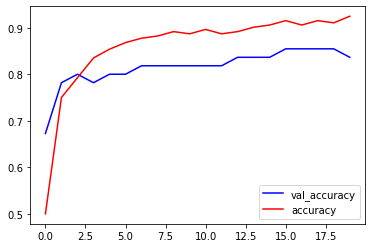

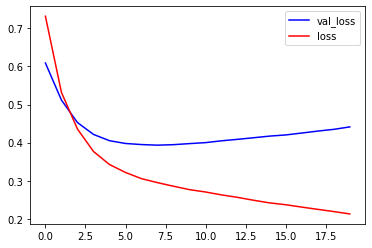

In [82]:
# visualize training 
plt.plot(history.history["val_accuracy"], label="val_accuracy", color="blue")
plt.plot(history.history["accuracy"], label="accuracy", color="red")
plt.legend()
plt.show()
plt.plot(history.history["val_loss"], label="val_loss", color="blue")
plt.plot(history.history["loss"], label="loss", color="red")
plt.legend()
plt.show()

# As a Dictionary

In [89]:
# get data
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))

# visualize 
for row in numeric_dict_ds.take(3):
    print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


# Using model subclass

In [92]:
# function to handle inputs 
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
        values.append(tf.cast(inputs[key], tf.float32))  # cast to 32 bit float 

    return fun(values, axis=-1) # What does fun do? 

# Model
class MyModel(tf.keras.Model):
    def __init__(self):
        # Create all the internal layers in init.
        super().__init__(self)

        self.normalizer = tf.keras.layers.Normalization(axis=-1)

        self.seq = tf.keras.Sequential([
          self.normalizer,
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1)
        ])

    def adapt(self, inputs):
        # Stack the inputs and `adapt` the normalization layer.
        inputs = stack_dict(inputs)
        self.normalizer.adapt(inputs)

    def call(self, inputs):
        # Stack the inputs
        inputs = stack_dict(inputs)
        # Run them through all the layers.
        result = self.seq(inputs)
        return result

# Create model
model = MyModel()
model.adapt(dict(numeric_features))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

# Training 
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

# Batch it 
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 [==============================] - 2s 12ms/step - loss: 0.6715 - accuracy: 0.6865
Epoch 2/5
152/152 [==============================] - 1s 10ms/step - loss: 0.5092 - accuracy: 0.7294
Epoch 3/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4649 - accuracy: 0.7360
Epoch 4/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4468 - accuracy: 0.7624
Epoch 5/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4387 - accuracy: 0.7657
Epoch 1/5
152/152 [==============================] - 2s 10ms/step - loss: 0.4336 - accuracy: 0.7624
Epoch 2/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4296 - accuracy: 0.7789
Epoch 3/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4283 - accuracy: 0.7723
Epoch 4/5
152/152 [==============================] - 2s 10ms/step - loss: 0.4262 - accuracy: 0.7822
Epoch 5/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4247 - accuracy: 0.7756


In [93]:
# Prediction
model.predict(dict(numeric_features.iloc[:3]))


array([[[ 0.27833122]],

       [[ 0.337853  ]],

       [[-0.05567427]]], dtype=float32)

# Keras Functional Style

In [94]:
# Organize data
inputs = {}
for name, column in numeric_features.items():
    inputs[name] = tf.keras.Input(
        shape=(1,), name=name, dtype=tf.float32) # convert 

inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [95]:
# Model and training
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)


Epoch 1/5
152/152 [==============================] - 2s 10ms/step - loss: 0.6000 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 2s 10ms/step - loss: 0.5333 - accuracy: 0.7261
Epoch 3/5
152/152 [==============================] - 1s 9ms/step - loss: 0.4885 - accuracy: 0.7426
Epoch 4/5
152/152 [==============================] - 1s 9ms/step - loss: 0.4659 - accuracy: 0.7492
Epoch 5/5
152/152 [==============================] - 1s 10ms/step - loss: 0.4553 - accuracy: 0.7723
